In [1]:
pip install mglearn

In [2]:
# 한글깨짐방지
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
import mglearn
import matplotlib.pyplot as plt


k-최근접 이웃 
 - k최근접 이웃 분류: 알고리즘이 훈련 데이터 셋에서 가장 가까운 데이터 포인터를 찾는다.</br>
  -> 최근접 이웃이라 함(Nearest Neighbors)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


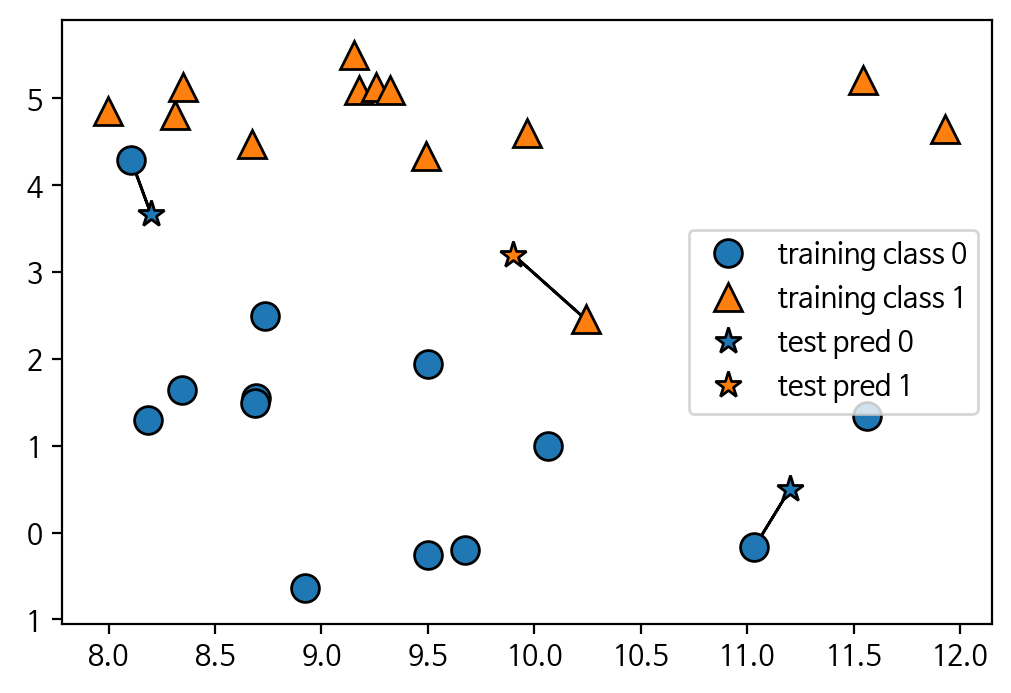

In [6]:
plt.figure(dpi = 100)
plt.rc('font', family = 'NanumBarunGothic')

mglearn.plots.plot_knn_classification(n_neighbors=1) # 제일 근접한 1개 이웃을 선택하기

forge 데이터 셋 분류의 예 -> forge 데이터 셋에 대한 3 - 최근접 이웃 모델의 예측

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


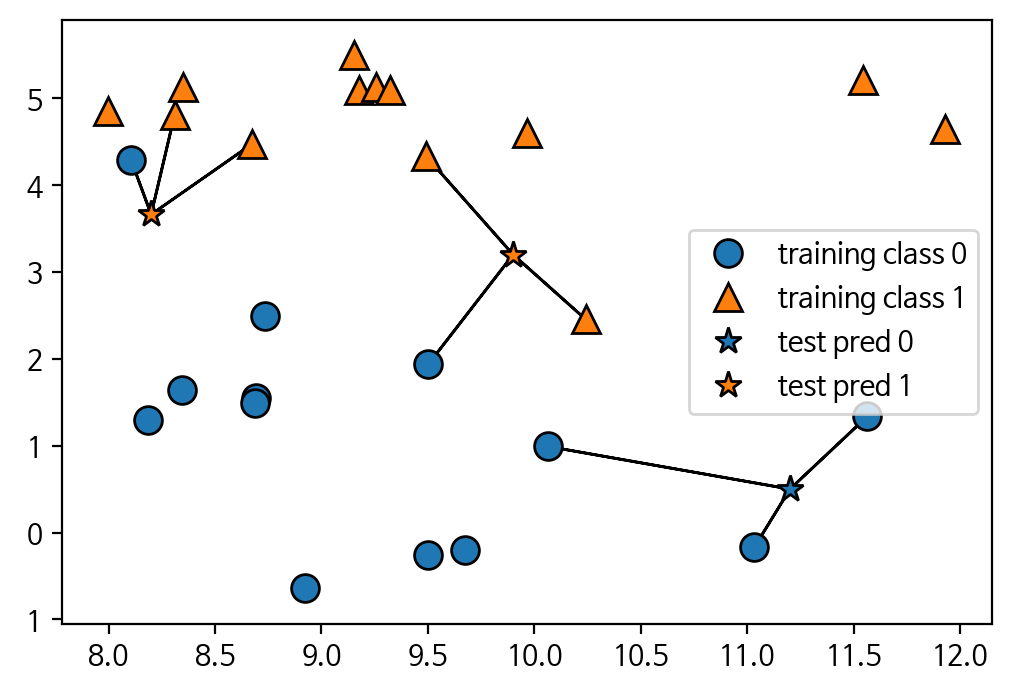

In [7]:
plt.figure(dpi = 100)
plt.rc('font', family = 'NanumBarunGothic')

mglearn.plots.plot_knn_classification(n_neighbors=3) # 제일 근접한 3개 이웃을 선택하기

분류 문제정의: forge 데이터 셋을 사용한 이진 분류(label, 1) 예측하기
k 최근접 이웃 알고리즘 적용하여 예측하고 평가하기

데이터 준비하기

In [8]:
X, y  = mglearn.datasets.make_forge() # X: 데이터(feature), y: 레이블(label, 정답)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [9]:
X # 2차원 배열

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [11]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

일반화 성능을 평가할 수 있도록 데이터를 분리(교차검증) -> 훈련세트(trainset) 테스트 셋(testset)

In [13]:
from sklearn.model_selection import train_test_split

# 대소문자 구분 주의깊게 잘하기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

KNeighborsClassifier를 임폴트하고 객체를 생성하기

In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3) # 이웃의 수를 3개로 지정하기


훈련 세트를 사용하여 분류 모델을 학습시키기

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

테스트 데이터에 대해 predict 메소드 호출하여 예측하기

테스트 세트의 각 데이터 포인트에 대해 훈련세트에서 가장 가까운 이웃을 계산-> 다음 가장 많은 클래스 찾기 -> 예측

In [16]:
clf.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1])

모델이 얼마나 잘 일반화 되었는지 평가하기

score()함수를 사용하여 테스트 데이터와 테스트 레이블을 넣어 호출하기

In [18]:
clf.score(X_test, y_test)

0.8571428571428571

In [19]:
clf.score(X_train, y_train)

0.9473684210526315

###KNeighborsClassifier 분석

* 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있음
* 이웃의 수를 늘릴수록 결정 경계는 더 부드러워짐
* 부드러운 경계는 더 단순한 모델을 의미함

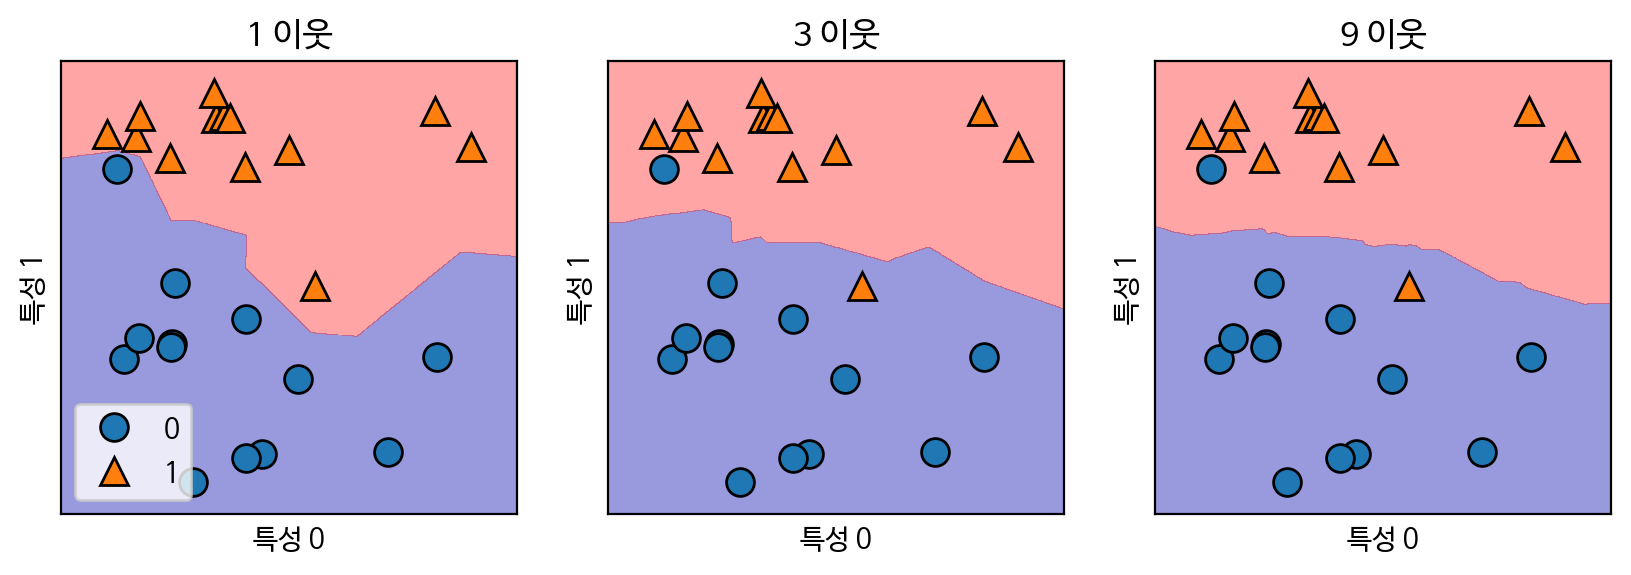

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), dpi = 100)

for n_neighbors, ax in zip([1, 3, 9], axes): # 이웃을 1. 3. 9일 때 결정 경계(decision boundary)를 정함

# 가장 핵심적인 코드
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)

# 2차원 데이터셋 분할 평면 그리기 
# mglearn.plot_2d_separator(model 객체, train 데이터, 평면 칠하기, 투명도)
  mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha=.4) # 결정경계 그리기
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) # 2차원 산점도의 데이터 셋을 그리기 위해

  ax.set_title('{} 이웃'.format(n_neighbors))
  ax.set_xlabel('특성 0')
  ax.set_ylabel('특성 1')

axes[0].legend(loc=3)
plt.show()

이웃의 수(결정 경계)에 따른 성능 평가하기

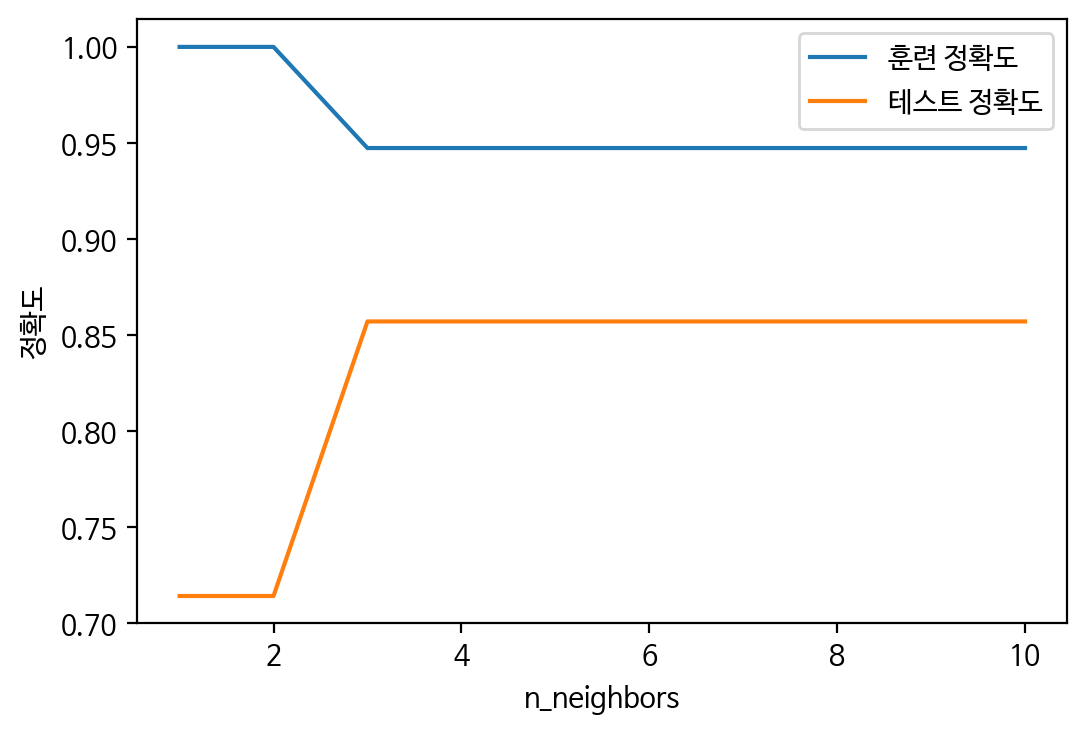

In [26]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용한다.

neighbor_setting = range(1, 11) # 범위값을 줌

for n_neighbors in neighbor_setting:
  # 모델 생성하기
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  # 훈련세트 정확도 저장하기
  train_accuracy.append(clf.score(X_train, y_train))

  # 테스트 세트 정확도 저장하기
  test_accuracy.append(clf.score(X_test, y_test))


plt.figure(dpi = 100)
plt.rc('font', family = 'NanumBarunGothic')

plt.plot(neighbor_setting, train_accuracy, label='훈련 정확도')
plt.plot(neighbor_setting, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')

plt.legend()
plt.show()

# 85% 가 최상의 정확도임 / 3 이웃을 결정해야함
# 이 코드는 책에 없음!!
# 결정경계를 늘릴수록 정확도는 떨어지게 되어있음


유방암 데이터셋을 사용하여 이웃의 수(결정 경계)에 따른 성능을 평가하기

데이터 준비하기

In [28]:
from sklearn.datasets import load_breast_cancer

# 데이터 다운로드 받기
cancer = load_breast_cancer()


데이터 셋 분리하기(훈련 세트. 테스트 셋)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify= cancer.target, random_state=77
)

이웃의 수(결정 경계)에 따른 성능 평가

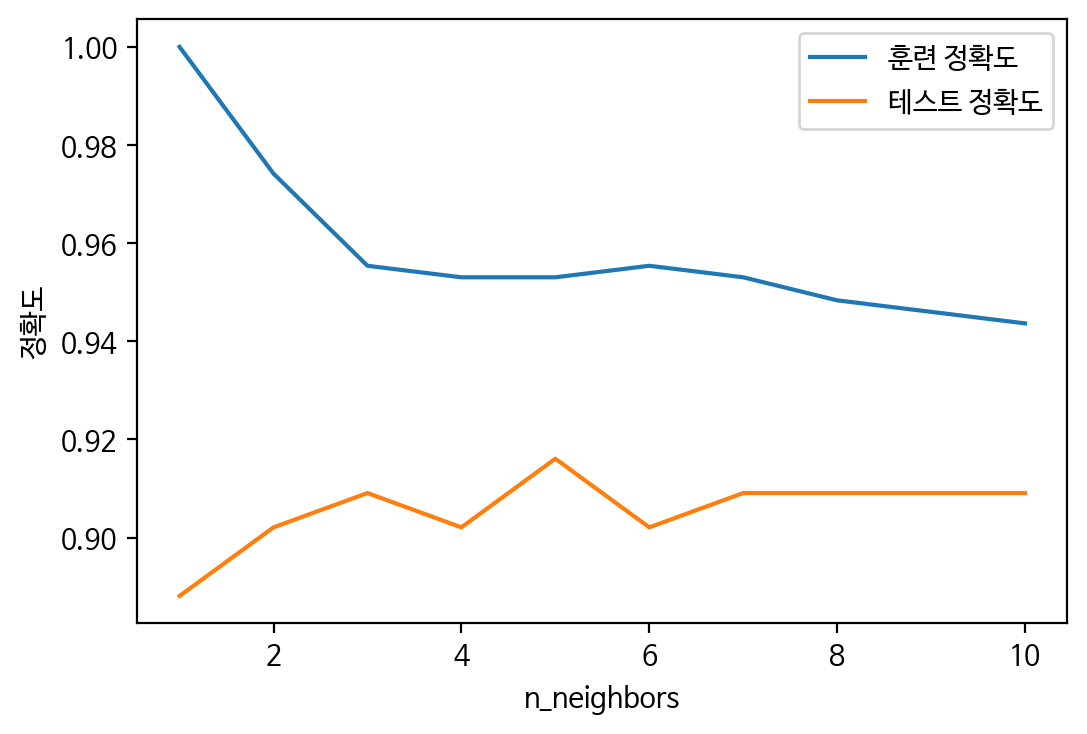

In [39]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용한다.

neighbor_setting = range(1, 11) # 범위값을 줌

for n_neighbors in neighbor_setting:
  # 모델 생성하기
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  # 훈련세트 정확도 저장하기
  train_accuracy.append(clf.score(X_train, y_train))

  # 테스트 세트 정확도 저장하기
  test_accuracy.append(clf.score(X_test, y_test))


plt.figure(dpi = 100)
plt.rc('font', family = 'NanumBarunGothic')

plt.plot(neighbor_setting, train_accuracy, label='훈련 정확도')
plt.plot(neighbor_setting, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')

plt.legend()
plt.show()

# 85% 가 최상의 정확도임 
# 이 코드는 책에 없음!!
# 결정경계를 늘릴수록 정확도는 떨어지게 되어있음
# 테스트 정확도가 가장 높은 구간을 선택하라!!!!!!!! - 5번을 선택하라

# 훈련 정확도와 테스트 정확도의 간격이 크면 오버피팅이 된 것
# 이진분류의 기준은 50%임 만약 그 밑이라면 굉장히 좋지 않은 모델

# 트레이닝 셋의 백점을 포기하라 
# 교차검증을 통해 모델이 제대로 학습하는지 확인하는 역할 / 교차검증은 성능 평가의 전 단계임
# 성능 평가는 성능 지표를 통해서 확인한다.

성능평가 - ROC 커브

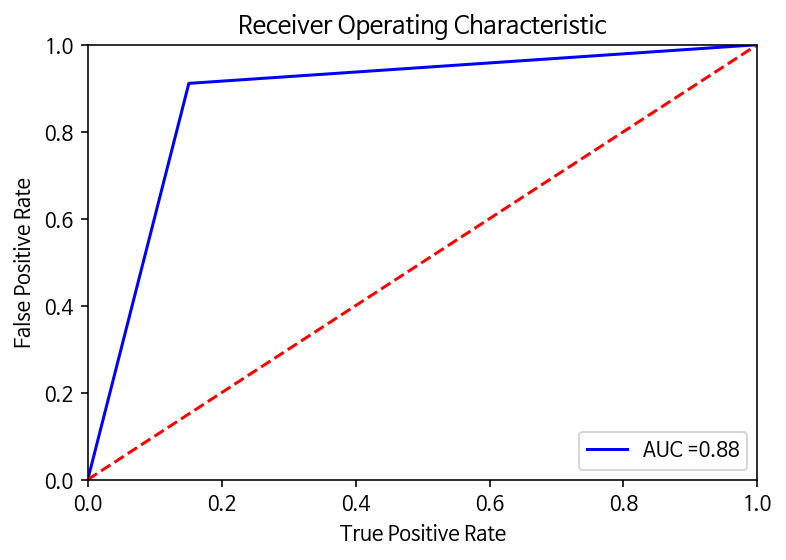

In [40]:
# Library for Analysing the ML model
from sklearn import metrics

# 모델 생성
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I:plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC =%0.2f' % roc_auc)
plt.legend()
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()

In [50]:
# test data를 가지고 y_hat을 예측(분류)
y_hat = clf.predict(X_test)

# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        53
           1       0.91      0.91      0.91        90

    accuracy                           0.89       143
   macro avg       0.88      0.88      0.88       143
weighted avg       0.89      0.89      0.89       143



In [54]:
# sklearn을 이용하면 전부 계산을 해준다.

print('accuracy:', metrics.accuracy_score(y_test, y_hat))
print('precision:', metrics.precision_score(y_test, y_hat))
print('recall:', metrics.recall_score(y_test, y_hat))
print('f1:', metrics.f1_score(y_test, y_hat))

accuracy: 0.8881118881118881
precision: 0.9111111111111111
recall: 0.9111111111111111
f1: 0.9111111111111111


k-Neighbors Regression
* k=1 경우 그냥 가장 가까운 이웃의 타켓값
* k >=2 경우 회귀분석 -> 여러 개의 최근접 이웃 간의 평균(average or mean)이 예측 값

wave 데이터 셋을 이용하여 이웃의 수(결정 경계)에 따라 성능을 평가함

데이터 셋 분리하기(훈련 셋, 데이터 셋)

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터 셋을 훈련세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0) # test size = 0.25


KNeighborsClassifier를 임포트하고 객체를 생성함

In [76]:
# 이웃의 수는 3으로 하여 모델 객체를 생성한다.
reg = KNeighborsRegressor(n_neighbors=3)

훈련 세트를 사용하여 회귀모델 학습

In [77]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

성능평가 하기

In [78]:
# score r-square 결정계수 0 ~ 1 사이 값을 가지고 관계가 높을수록 1에 가까운 값을 가진다.
# 0에 가까울수록 데이터 분포를 제대로 표현하지 못한 것임
print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


KNeighborsRegressor 분석

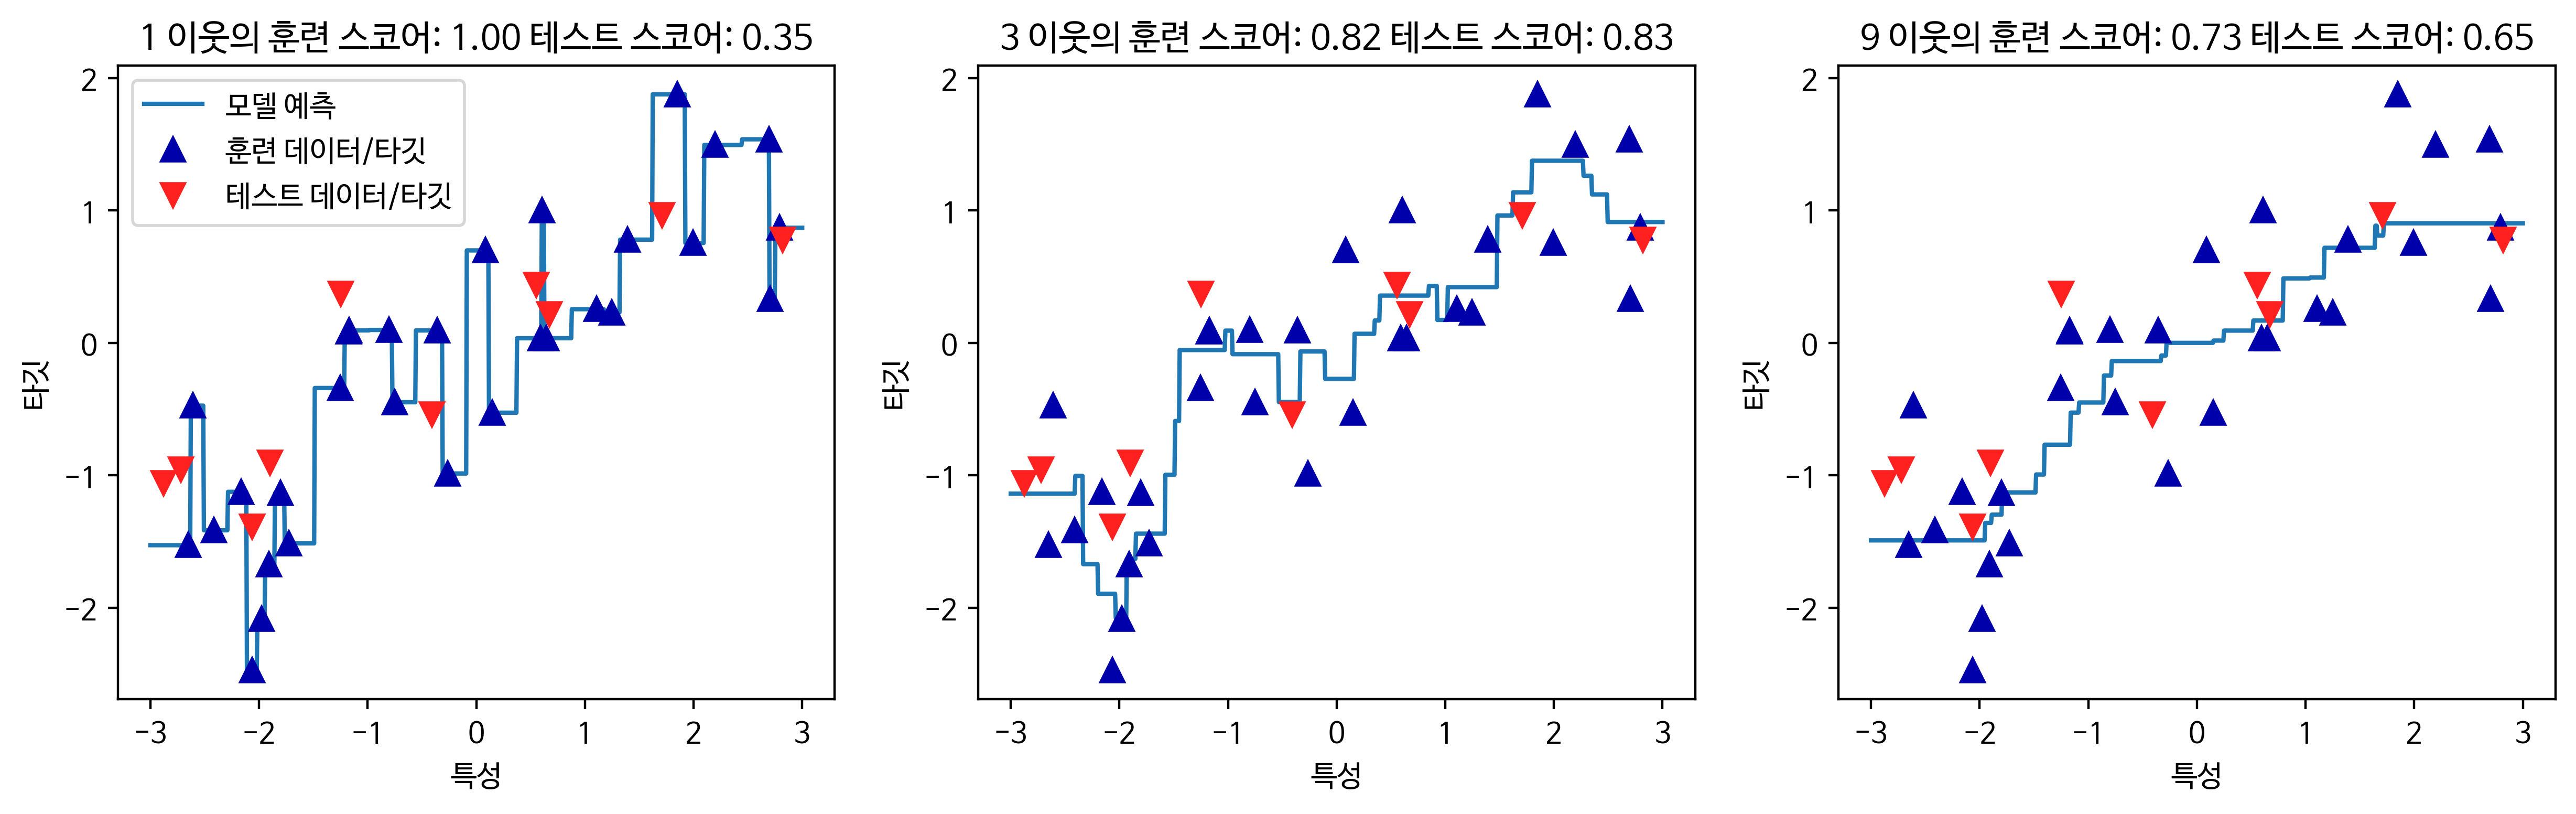

In [79]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4),dpi = 200)
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()


선형 모델: 선형 함수를 만들어 예측을 수행함

선형 회귀 모델

w[0]: 0.393906  b: -0.031804


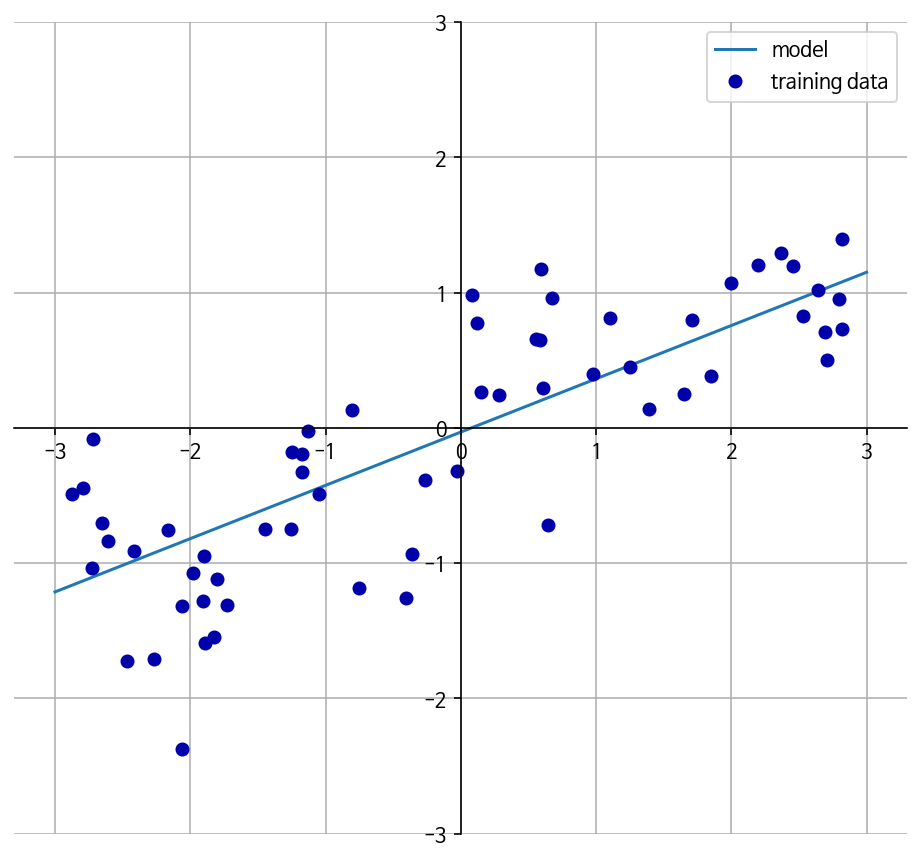

In [80]:
mglearn.plots.plot_linear_regression_wave()

선형회귀(최소제곱법)

데이터 준비하기

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


선형모델 만든 후 학습시키기

In [85]:
lr = LinearRegression().fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

lr객체 확인하기

In [88]:
print('lr.coef_: ', lr.coef_) # w가중치, 기울기
print('lr.intercept_: ',lr.intercept_) # 절편


lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746


성능 평가하기

In [90]:
print('훈련 세트 점수',lr.score(X_train, y_train))
print('테스트 세트 점수', lr.score(X_test, y_test))

# 훈련-테스트 세트의 점수가 비슷하고, 낮으면 과소 적합된 상황

훈련 세트 점수 0.6700890315075756
테스트 세트 점수 0.65933685968637


보스턴 주택가격 데이터셋을 사용한 선형 회귀 성능 평가

데이터 셋 분리하기

In [92]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

훈련 데이터셋으로 학습하기

In [93]:
lr = LinearRegression().fit(X_train, y_train)

성능 평가하기

In [96]:
print('훈련 세트 점수',lr.score(X_train, y_train))
print('테스트 세트 점수', lr.score(X_test, y_test)) # 과대 적합 상태에 입각했음

훈련 세트 점수 0.9520519609032727
테스트 세트 점수 0.6074721959665571


릿지 회귀 -> 규제를 통해서 과대적합 되지 않게 하기 위한 선형 모델

보스턴 주택가격 데이터셋을 사용한 선형 회귀 성능 평가

In [98]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

In [99]:
print('훈련 세트 점수',ridge.score(X_train, y_train))
print('테스트 세트 점수', ridge.score(X_test, y_test))


훈련 세트 점수 0.8857966585170942
테스트 세트 점수 0.7527683481744757


alpha 매개변수를 통해 모델 설정하기

In [101]:
# alpha 값만 조정하여 성능 평하가기
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('훈련 세트 점수',ridge10.score(X_train, y_train))
print('테스트 세트 점수', ridge10.score(X_test, y_test))

훈련 세트 점수 0.7882787115369615
테스트 세트 점수 0.6359411489177311


In [102]:
# alpha 값만 조정하여 성능 평하가기
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('훈련 세트 점수',ridge01.score(X_train, y_train))
print('테스트 세트 점수', ridge01.score(X_test, y_test))

훈련 세트 점수 0.9282273685001985
테스트 세트 점수 0.7722067936480157


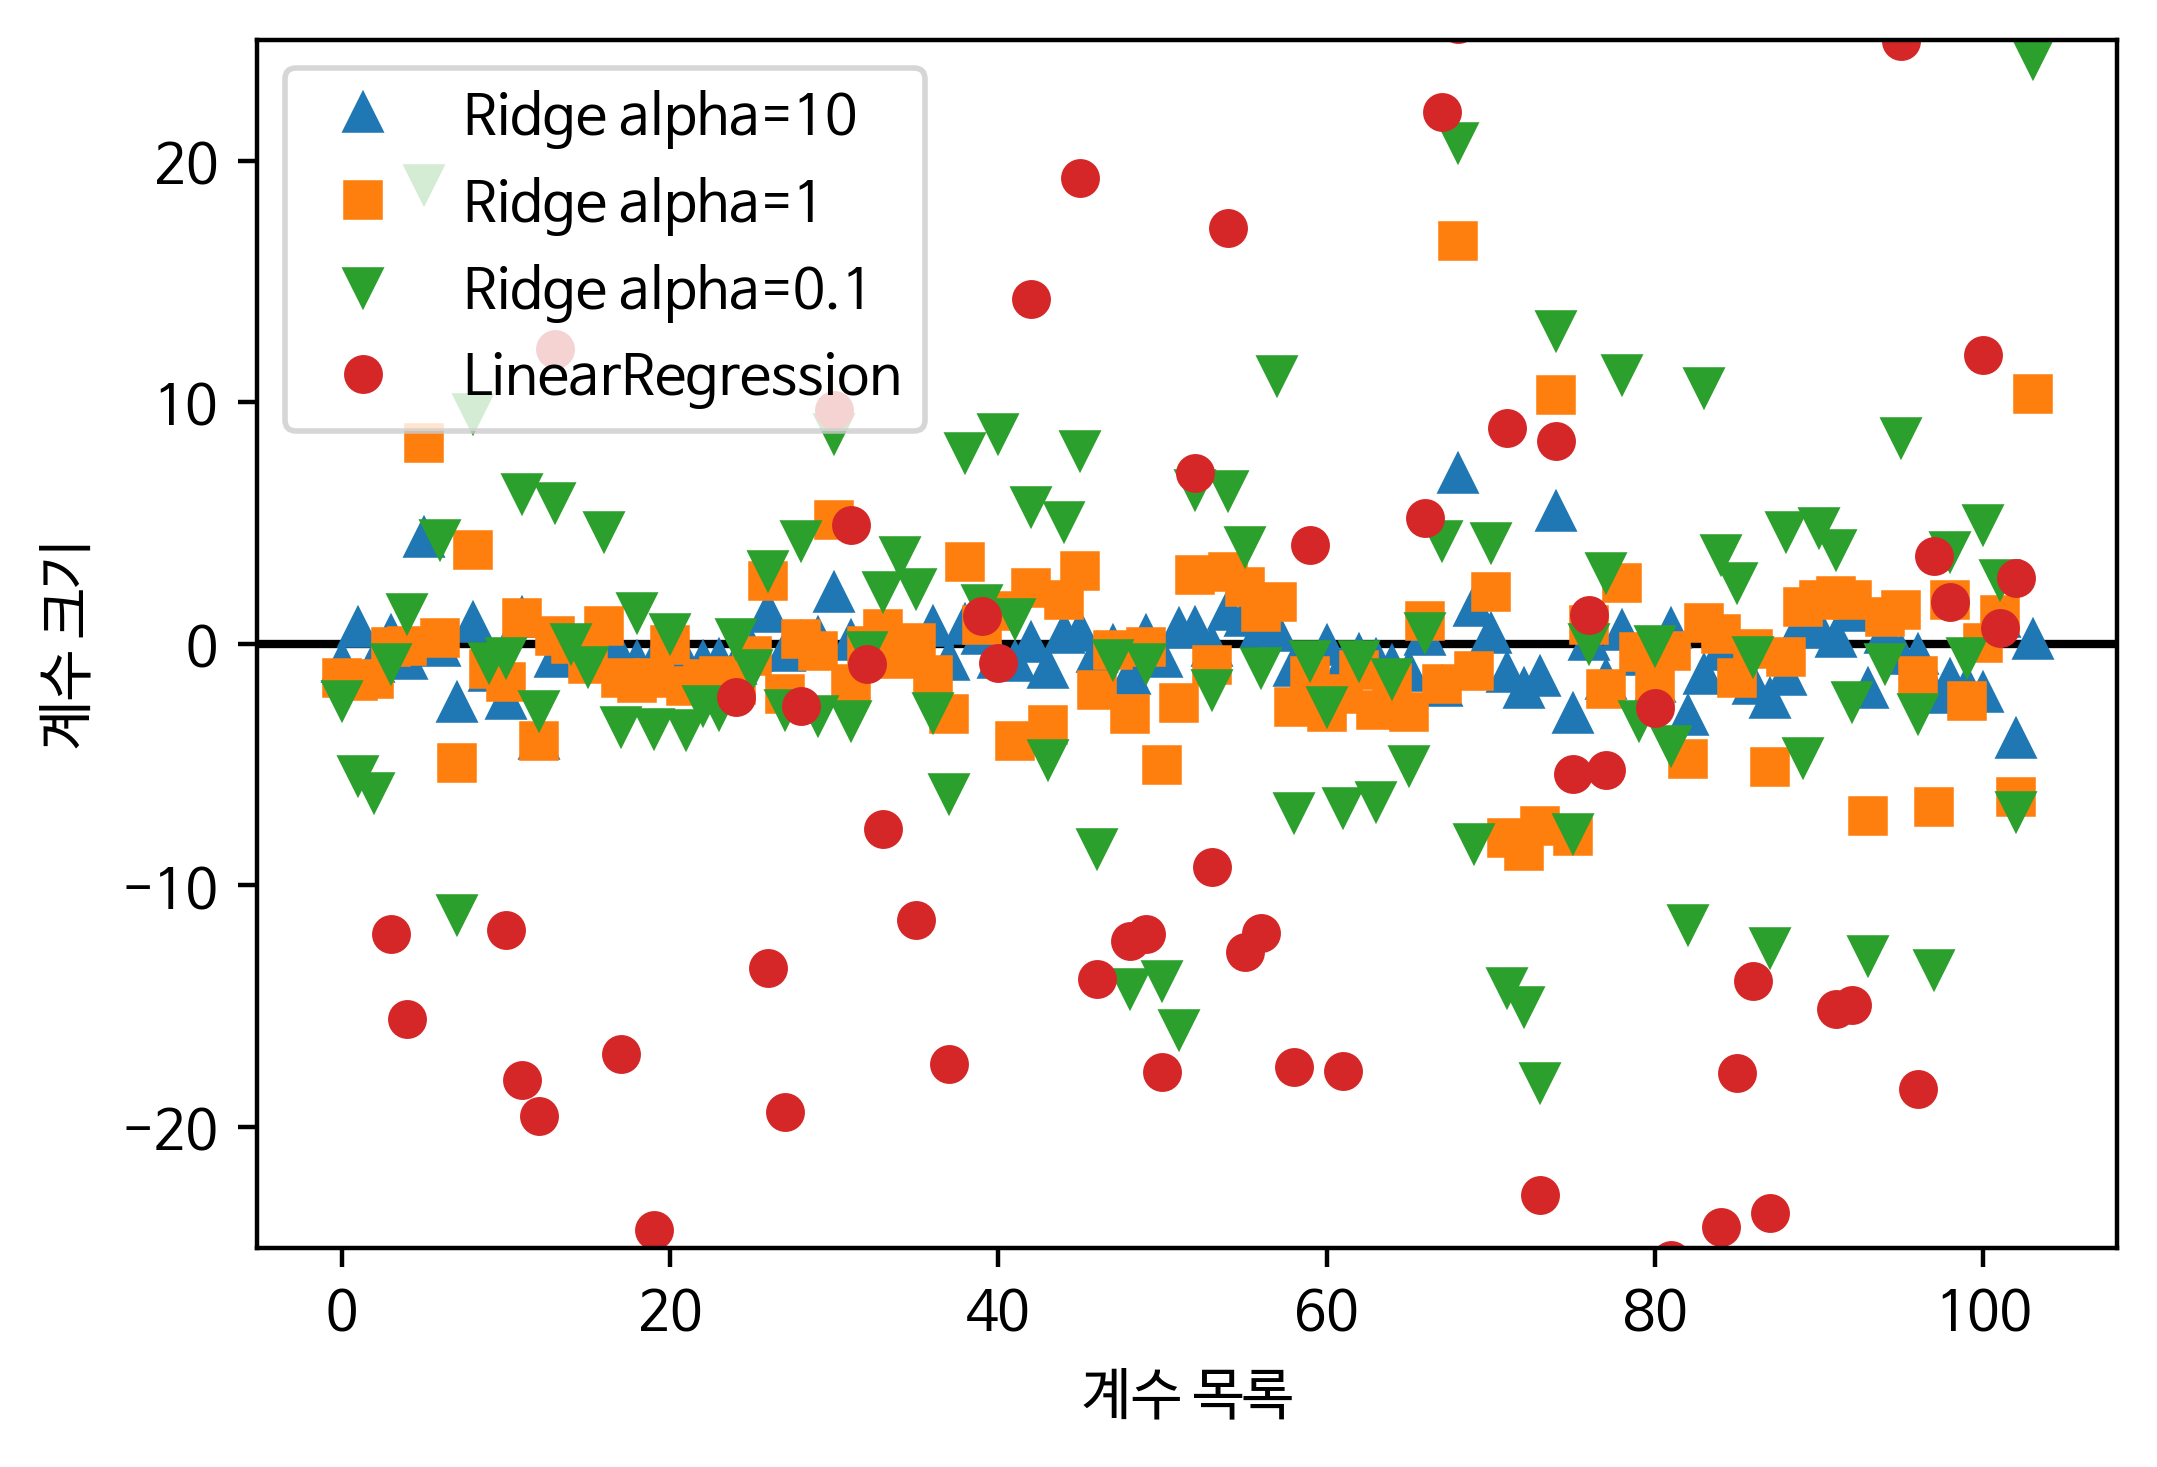

In [103]:
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi = 200)

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()


In [107]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('훈련 세트 점수',lasso.score(X_train, y_train))
print('테스트 세트 점수',lasso.score(X_test, y_test)) # 과소적합 상태
print('사용한 특성의 개수:',np.sum(lasso.coef_!=0))

훈련 세트 점수 0.29323768991114607
테스트 세트 점수 0.20937503255272294
사용한 특성의 개수: 4


과소 적합을 줄이기 위해서 alpha 값을 설정함

In [110]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print('훈련 세트 점수',lasso001.score(X_train, y_train))
print('테스트 세트 점수',lasso001.score(X_test, y_test)) # 과소적합 상태
print('사용한 특성의 개수:',np.sum(lasso001.coef_!=0))

훈련 세트 점수 0.8961122320864716
테스트 세트 점수 0.7677995670886713
사용한 특성의 개수: 32


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318007, tolerance: 3.233182126649076
  positive)
